In [23]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

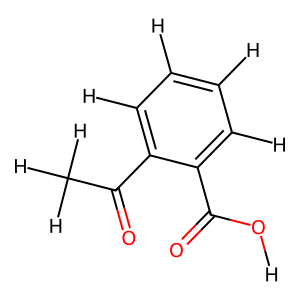

In [ ]:
mol = Chem.MolFromSmiles("CC(=O)C1=CC=CC=C1C(=O)O")
mol = Chem.AddHs(mol)
Draw.MolToImage(
    mol, size=(300, 300), kekulize=True, wedgeBonds=True, includeAtomNumbers=True
)

In [25]:
AllChem.EmbedMolecule(mol, randomSeed=42)

0

In [26]:
conf = mol.GetConformer()
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    elem = atom.GetSymbol()
    pos = conf.GetAtomPosition(idx)
    print(f"Atom {idx}: {elem} {pos.x:.2f}, {pos.y:.2f}, {pos.z:.2f}")

Atom 0: C 1.52, 2.02, 0.81
Atom 1: C 0.63, 0.95, 1.29
Atom 2: O 0.46, 0.98, 2.56
Atom 3: C -0.06, -0.09, 0.60
Atom 4: C -0.49, -1.18, 1.39
Atom 5: C -1.03, -2.33, 0.90
Atom 6: C -1.17, -2.48, -0.45
Atom 7: C -0.77, -1.45, -1.25
Atom 8: C -0.22, -0.25, -0.75
Atom 9: C -0.02, 0.79, -1.72
Atom 10: O -0.06, 0.45, -2.95
Atom 11: O 0.21, 2.13, -1.53
Atom 12: H 2.31, 2.11, 1.65
Atom 13: H 1.05, 3.00, 0.70
Atom 14: H 2.17, 1.74, -0.04
Atom 15: H -0.41, -1.13, 2.49
Atom 16: H -1.34, -3.13, 1.55
Atom 17: H -1.59, -3.39, -0.87
Atom 18: H -0.90, -1.60, -2.32
Atom 19: H -0.28, 2.87, -2.05


In [ ]:
import nglview as nv

view = nv.show_rdkit(mol)
view

NGLWidget()

In [ ]:
import copy

opt_mol = copy.deepcopy(mol)
AllChem.UFFOptimizeMolecule(opt_mol)

0

In [29]:
conf = opt_mol.GetConformer()
for atom in opt_mol.GetAtoms():
    idx = atom.GetIdx()
    elem = atom.GetSymbol()
    pos = conf.GetAtomPosition(idx)
    print(f"Atom {idx}: {elem} {pos.x:.2f}, {pos.y:.2f}, {pos.z:.2f}")

Atom 0: C 1.81, 1.66, 0.74
Atom 1: C 0.53, 1.08, 1.26
Atom 2: O 0.02, 1.58, 2.31
Atom 3: C -0.10, -0.10, 0.63
Atom 4: C -0.35, -1.22, 1.45
Atom 5: C -0.86, -2.40, 0.90
Atom 6: C -1.12, -2.48, -0.46
Atom 7: C -0.90, -1.37, -1.29
Atom 8: C -0.41, -0.16, -0.75
Atom 9: C -0.30, 1.01, -1.65
Atom 10: O -0.09, 0.85, -2.88
Atom 11: O -0.46, 2.30, -1.15
Atom 12: H 2.60, 1.56, 1.51
Atom 13: H 1.67, 2.73, 0.50
Atom 14: H 2.15, 1.12, -0.17
Atom 15: H -0.13, -1.18, 2.51
Atom 16: H -1.03, -3.25, 1.54
Atom 17: H -1.50, -3.40, -0.89
Atom 18: H -1.14, -1.45, -2.34
Atom 19: H -0.40, 3.11, -1.76


In [ ]:
import nglview as nv

view = nv.show_rdkit(opt_mol)
view

NGLWidget()

In [31]:
AllChem.AlignMol(mol, opt_mol)

rmsd = AllChem.GetBestRMS(mol, opt_mol)
print(f"RMSD: {rmsd:.2f} Å")

RMSD: 0.39 Å


In [32]:
comb_mol = Chem.CombineMols(mol, opt_mol)
nv.show_rdkit(comb_mol)

NGLWidget()

In [33]:
AllChem.EmbedMultipleConfs(mol, numConfs=20, randomSeed=42)

In [ ]:
from rdkit.Chem import rdMolAlign

for cid in range(mol.GetNumConformers()):
    AllChem.UFFOptimizeMolecule(mol, confId=cid)

heavy_ids = [a.GetIdx() for a in mol.GetAtoms() if a.GetAtomicNum() != 1]
rmsd_list = rdMolAlign.AlignMolConformers(mol)

In [ ]:
view = nv.NGLWidget()
for cid in range(mol.GetNumConformers()):
    comp = view.add_component(nv.RdkitStructure(mol, conf_id=cid))
view.center()
view

NGLWidget()

In [ ]:
Chem.MolToPDBFile(mol, "molecule.pdb", confId=0)

In [64]:
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors3D, Descriptors, rdMolDescriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

AllChem.EmbedMolecule(mol, AllChem.ETKDGv3())
AllChem.UFFOptimizeMolecule(mol)

descs = Descriptors3D.CalcMolDescriptors3D(mol)
descs

{'PMI1': 462.7073462324673,
 'PMI2': 495.03405842037256,
 'PMI3': 871.925066460825,
 'NPR1': 0.5306732929592367,
 'NPR2': 0.5677483965792307,
 'RadiusOfGyration': 2.360680949235626,
 'InertialShapeFactor': 0.001227014010479942,
 'Eccentricity': 0.8475764603502152,
 'Asphericity': 0.1855320979824671,
 'SpherocityIndex': 0.14011475066646442,
 'PBF': 0.4122658171294401}

In [ ]:
from rdkit.Chem import rdMolDescriptors

descs = rdMolDescriptors.CalcAUTOCORR3D(mol)
descs[:10]

[0.134, 0.37, 0.617, 0.776, 0.89, 0.679, 0.219, 0.0, 0.0, 0.0]